###Loading the data in and noting what information

In [40]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c4147f9_data/data.zip
!unzip data

--2023-07-24 16:11:00--  https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c4147f9_data/data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.218.56, 52.216.218.8, 52.217.133.240, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.218.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113826 (111K) [application/zip]
Saving to: ‘data.zip.1’

data.zip.1          100%[===================>] 111.16K  --.-KB/s    in 0.04s   

2023-07-24 16:11:00 (2.68 MB/s) - ‘data.zip.1’ saved [113826/113826]

Archive:  data.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [41]:
import pandas as pd
import numpy as np
import os

In [42]:
file = 'data/file_information.csv'
df = pd.read_csv(file)
df.head(10)

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non
5,g0pB_taska.txt,a,non
6,g0pB_taskb.txt,b,non
7,g0pB_taskc.txt,c,cut
8,g0pB_taskd.txt,d,light
9,g0pB_taske.txt,e,heavy


Each text file contains an answer to one short question; these questions are labeled as tasks A-E
Each text file has an associated plagiarism label/category:

    cut: An answer is plagiarized; it is copy-pasted directly from the relevant Wikipedia source text.
    light: An answer is plagiarized; it is based on the Wikipedia source text and includes some copying and paraphrasing.
    heavy: An answer is plagiarized; it is based on the Wikipedia source text but expressed using different words and structure. Since this doesn't copy directly from a source text, this will likely be the most challenging kind of plagiarism to detect.
    non: An answer is not plagiarized; the Wikipedia source text is not used to create this answer.
    orig: This is a specific category for the original, Wikipedia source text. We will use these files only for comparison purposes.




Number of file 100
Number of unique file(A-E) 5
Unique plagiarism categories:  ['non' 'cut' 'light' 'heavy' 'orig'] 



Task & Plagiarism Level Combos :


,Task,Category,Counts
0,a,cut,4
1,a,heavy,3
2,a,light,3
3,a,non,9
4,a,orig,1
5,b,cut,3
6,b,heavy,4
7,b,light,3
8,b,non,9
9,b,orig,1


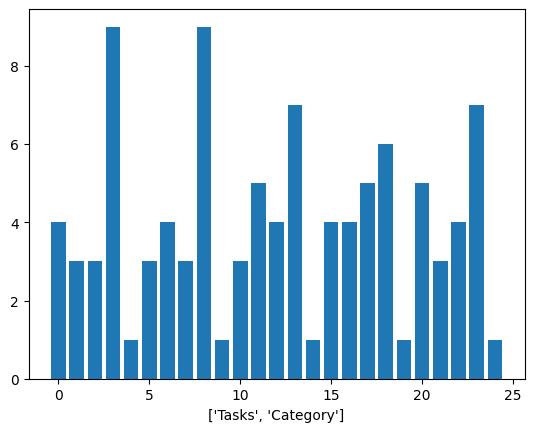

In [43]:
print("Number of file",df.shape[0])
print("Number of unique file(A-E)",len(df['Task'].unique()))
print('Unique plagiarism categories: ', (df['Category'].unique()),"\n\n")

counts_task_plagiarism=df.groupby(['Task', 'Category']).size().reset_index(name="Counts")
print("\nTask & Plagiarism Level Combos :")
display(counts_task_plagiarism)

import matplotlib.pyplot as plt
counts = df.groupby(['Task','Category']).size().reset_index(name="Counts")
plt.bar(range(len(counts)), counts['Counts'])
plt.xlabel(['Tasks','Category'])
plt.show()


###Pre processing of data


```
0 = non
1 = heavy
2 = light
3 = cut
-1 = orig

```


```
#New class
Any answer text that is not plagiarized (non) should have the class label 0.
Any plagiarized answer texts should have the class label 1.
And any orig texts will have a special label -1.

```




In [44]:
def convert(x):
    if x == 'non':
        return 0
    elif x == 'heavy':
        return 1
    elif x == 'light':
        return 2
    elif x == 'cut':
        return 3
    elif x == 'orig':
        return -1

def convert_class(x):
    if x == 'non':
        return 0
    elif x in ['heavy','light','cut']:
        return 1
    elif x == 'orig':
        return -1

df['Category_new'] = df['Category'].apply(lambda x: convert(x))
df['Class'] = df['Category'].apply(lambda x: convert_class(x))
df.drop(['Category'],axis=1, inplace=True)
df.rename(columns={'Category_new': 'Category'}, inplace=True)
df

,File,Task,Category,Class
0,g0pA_taska.txt,a,0,0
1,g0pA_taskb.txt,b,3,1
2,g0pA_taskc.txt,c,2,1
3,g0pA_taskd.txt,d,1,1
4,g0pA_taske.txt,e,0,0
...,...,...,...,...
95,orig_taska.txt,a,-1,-1
96,orig_taskb.txt,b,-1,-1
97,orig_taskc.txt,c,-1,-1
98,orig_taskd.txt,d,-1,-1


In [45]:
import helpers
df=helpers.create_text_column(df)
df

,File,Task,Category,Class,Text
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...
...,...,...,...,...,...
95,orig_taska.txt,a,-1,-1,in object oriented programming inheritance is ...
96,orig_taskb.txt,b,-1,-1,pagerank is a link analysis algorithm used by ...
97,orig_taskc.txt,c,-1,-1,vector space model or term vector model is an ...
98,orig_taskd.txt,d,-1,-1,in probability theory bayes theorem often call...


In [46]:
print('Sample text:\n\n', df.iloc[0]['Text'])

Sample text:

 inheritance is a basic concept of object oriented programming where the basic idea is to create new classes that add extra detail to existing classes this is done by allowing the new classes to reuse the methods and variables of the existing classes and new methods and classes are added to specialise the new class inheritance models the is kind of relationship between entities or objects  for example postgraduates and undergraduates are both kinds of student this kind of relationship can be visualised as a tree structure where student would be the more general root node and both postgraduate and undergraduate would be more specialised extensions of the student node or the child nodes  in this relationship student would be known as the superclass or parent class whereas  postgraduate would be known as the subclass or child class because the postgraduate class extends the student class  inheritance can occur on several layers where if visualised would display a larger tree

Spliting the data


```
    train - Training data, for model training.
    test - Testing data, for model evaluation.
    orig - The task's original answer from wikipedia.
```



In [47]:
random_seed=1#define randomness
complete_df = helpers.train_test_dataframe(df, random_seed=random_seed)
complete_df.head(10)

,File,Task,Category,Class,Text,Datatype
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...,train
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...,test
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...,train
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...,train
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...,train
5,g0pB_taska.txt,a,0,0,inheritance is a basic concept in object orien...,train
6,g0pB_taskb.txt,b,0,0,pagerank pr refers to both the concept and the...,train
7,g0pB_taskc.txt,c,3,1,vector space model is an algebraic model for r...,test
8,g0pB_taskd.txt,d,2,1,bayes theorem relates the conditional and marg...,train
9,g0pB_taske.txt,e,1,1,dynamic programming is a method for solving ma...,test


Similarity Features


```
One of the ways we might go about detecting plagiarism, is by computing
similarity features that measure how similar a given answer text is as compared
to the original wikipedia source text
```
#####Containment is defined as the intersection of the n-gram word count of the Wikipedia Source Text (S) with the n-gram word count of the Student Answer Text (S) divided by the n-gram word count of the Student Answer Text



In [48]:
from sklearn.feature_extraction.text import CountVectorizer

def containment(ngram_arr):#text similarity
    intersection_list = np.amin(ngram_arr, axis=0)
    intersection = np.sum(intersection_list)
    answer_idx = 0
    answer_cnt = np.sum(ngram_arr[answer_idx])
    containment_val =  intersection / answer_cnt
    return containment_val

def calculate_containment(df, n, answer):
    source= 'orig_' + answer.split('_')[1]
    a_text = df[df['File'] == answer]['Text'].values[0]
    s_text = df[df['File'] == source]['Text'].values[0]
    counts = CountVectorizer(analyzer='word', ngram_range=(n,n))
    ngrams = counts.fit_transform([a_text, s_text])
    ngram_array = ngrams.toarray()

    return containment(ngram_array)

calculate_containment(complete_df, 1, 'g0pB_taskd.txt')

n = 3
test_indices = range(5)
category_vals = []
containment_vals = []

for i in test_indices:
    category_vals.append(complete_df.loc[i, 'Category'])
    filename = complete_df.loc[i, 'File']
    c = calculate_containment(complete_df, n, filename)
    containment_vals.append(c)

print('Original category values: \n', category_vals)
print()
print(str(n)+'-gram containment values: \n', containment_vals)
print()

Original category values: 
 [0, 3, 2, 1, 0]

3-gram containment values: 
 [0.009345794392523364, 0.9641025641025641, 0.6136363636363636, 0.15675675675675677, 0.031746031746031744]



######The longest common subsequence is the longest string of words (or letters) that are the same between the Wikipedia Source Text (S) and the Student Answer Text (A).

In [49]:
def lcs_norm_word(answer_text, source_text):
    list_A = answer_text.split()
    word_count_A = len(list_A)
    list_S = source_text.split()
    lcs_matrix = np.zeros((len(list_S) + 1, len(list_A) + 1), dtype=int)

    for r_idx,r_word in enumerate(list_S, 1):
        for c_idx,c_word in enumerate(list_A, 1):
            if c_word == r_word:
                lcs_matrix[r_idx][c_idx] = lcs_matrix[r_idx-1][c_idx-1] + 1
            else:
                lcs_matrix[r_idx][c_idx] = max(lcs_matrix[r_idx][c_idx-1], lcs_matrix[r_idx-1][c_idx])

    lcs_val = lcs_matrix[len(list_S)][len(list_A)]
    lcs_norm = lcs_val/word_count_A
    return lcs_norm

In [50]:
A = "i think pagerank is a link analysis algorithm used by google that uses a system of weights attached to each element of a hyperlinked set of documents"
S = "pagerank is a link analysis algorithm used by the google internet search engine that assigns a numerical weighting to each element of a hyperlinked set of documents"
lcs = lcs_norm_word(A, S)
print('LCS = ', lcs)
#
print('Test passed!')

LCS =  0.7407407407407407
Test passed!


In [51]:
category_vals = []
lcs_norm_vals = []
for i in test_indices:
    category_vals.append(complete_df.loc[i, 'Category'])
    answer_text = complete_df.loc[i, 'Text']
    task = complete_df.loc[i, 'Task']
    orig_rows = complete_df[(complete_df['Class'] == -1)]
    orig_row = orig_rows[(orig_rows['Task'] == task)]
    source_text = orig_row['Text'].values[0]
    lcs_val = lcs_norm_word(answer_text, source_text)
    lcs_norm_vals.append(lcs_val)

print('Original category values: \n', category_vals)
print()
print('Normalized LCS values: \n', lcs_norm_vals)

Original category values: 
 [0, 3, 2, 1, 0]

Normalized LCS values: 
 [0.1917808219178082, 0.8207547169811321, 0.8464912280701754, 0.3160621761658031, 0.24257425742574257]


In [52]:
def create_containment_features(df, n, column_name=None):
    containment_values = []
    if(column_name==None):
        column_name = 'c_'+str(n)
    for i in df.index:
        file = df.loc[i, 'File']
        if df.loc[i,'Category'] > -1:
            c = calculate_containment(df, n, file)
            containment_values.append(c)
        else:
            containment_values.append(-1)

    print(str(n)+'-gram containment features created!')
    return containment_values

In [53]:
def create_lcs_features(df, column_name='lcs_word'):

    lcs_values = []
    for i in df.index:
        if df.loc[i,'Category'] > -1:
            answer_text = df.loc[i, 'Text']
            task = df.loc[i, 'Task']
            orig_rows = df[(df['Class'] == -1)]
            orig_row = orig_rows[(orig_rows['Task'] == task)]
            source_text = orig_row['Text'].values[0]
            lcs = lcs_norm_word(answer_text, source_text)
            lcs_values.append(lcs)
        else:
            lcs_values.append(-1)

    print('LCS features created!')
    return lcs_values

In [54]:
ngram_range = range(1,7)
features_list = []

all_features = np.zeros((len(ngram_range)+1, len(complete_df)))
i=0
for n in ngram_range:
    column_name = 'c_'+str(n)
    features_list.append(column_name)
    all_features[i]=np.squeeze(create_containment_features(complete_df, n))
    i+=1

features_list.append('lcs_word')
all_features[i]= np.squeeze(create_lcs_features(complete_df))
features_df = pd.DataFrame(np.transpose(all_features), columns=features_list)
print()
print('Features: ', features_list)
print()
features_df.head(10)

1-gram containment features created!
2-gram containment features created!
3-gram containment features created!
4-gram containment features created!
5-gram containment features created!
6-gram containment features created!
LCS features created!

Features:  ['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'lcs_word']



,c_1,c_2,c_3,c_4,c_5,c_6,lcs_word
0,0.398148,0.079070,0.009346,0.000000,0.000000,0.000000,0.191781
1,1.000000,0.984694,0.964103,0.943299,0.922280,0.901042,0.820755
2,0.869369,0.719457,0.613636,0.515982,0.449541,0.382488,0.846491
3,0.593583,0.268817,0.156757,0.108696,0.081967,0.060440,0.316062
4,0.544503,0.115789,0.031746,0.005319,0.000000,0.000000,0.242574
5,0.329502,0.053846,0.007722,0.003876,0.000000,0.000000,0.161172
6,0.590308,0.150442,0.035556,0.004464,0.000000,0.000000,0.301653
7,0.765306,0.709898,0.664384,0.625430,0.589655,0.553633,0.621711
8,0.759777,0.505618,0.395480,0.306818,0.245714,0.195402,0.484305
9,0.884444,0.526786,0.340807,0.247748,0.180995,0.150000,0.597458


In [55]:
corr_matrix = features_df.corr().abs().round(2)
display(corr_matrix)

,c_1,c_2,c_3,c_4,c_5,c_6,lcs_word
c_1,1.00,0.94,0.90,0.89,0.88,0.87,0.97
c_2,0.94,1.00,0.99,0.98,0.97,0.96,0.98
c_3,0.90,0.99,1.00,1.00,0.99,0.98,0.97
c_4,0.89,0.98,1.00,1.00,1.00,0.99,0.95
c_5,0.88,0.97,0.99,1.00,1.00,1.00,0.95
c_6,0.87,0.96,0.98,0.99,1.00,1.00,0.94
lcs_word,0.97,0.98,0.97,0.95,0.95,0.94,1.00




```
    complete_df: A DataFrame that contains all of our processed text data, file info, datatypes, and class labels
    features_df: A DataFrame of all calculated features, such as containment for ngrams, n= 1-5, and lcs values for each text file listed in the complete_df (this was created in the above cells)
    selected_features: A list of feature column names, ex. ['c_1', 'lcs_word'], which will be used to select the final features in creating train/test sets of data.



In [56]:
def train_test_data(complete_df, features_df, selected_features):
    new_features_df = features_df.copy()
    new_features_df['Class'] = complete_df['Class']
    new_features_df['Datatype'] = complete_df['Datatype']

    train_x = new_features_df.loc[new_features_df['Datatype'] == 'train', selected_features].values
    train_y = np.squeeze(new_features_df.loc[new_features_df['Datatype'] == 'train', ['Class']].values)

    test_x = new_features_df.loc[new_features_df['Datatype'] == 'test', selected_features].values
    test_y = np.squeeze(new_features_df.loc[new_features_df['Datatype'] == 'test', ['Class']].values)

    return (train_x, train_y), (test_x, test_y)

test_selection = list(features_df)[:2]
(train_x, train_y), (test_x, test_y) = train_test_data(complete_df, features_df, test_selection)

In [57]:
selected_features = ['c_1', 'c_5', 'lcs_word']

(train_x, train_y), (test_x, test_y) = train_test_data(complete_df, features_df, selected_features)

print('Training size: ', len(train_x))
print('Test size: ', len(test_x))
print('Training df sample: \n', train_x[:10])

Training size:  70
Test size:  25
Training df sample: 
 [[0.39814815 0.         0.19178082]
 [0.86936937 0.44954128 0.84649123]
 [0.59358289 0.08196721 0.31606218]
 [0.54450262 0.         0.24257426]
 [0.32950192 0.         0.16117216]
 [0.59030837 0.         0.30165289]
 [0.75977654 0.24571429 0.48430493]
 [0.51612903 0.         0.27083333]
 [0.44086022 0.         0.22395833]
 [0.97945205 0.78873239 0.9       ]]


In [58]:
def make_csv(x, y, filename, data_dir):
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1).to_csv(os.path.join(data_dir, filename), header=False, index=False)
    print('Path created: '+str(data_dir)+'/'+str(filename))

In [59]:
fake_x = [ [0.39814815, 0.0001, 0.19178082],
           [0.86936937, 0.44954128, 0.84649123],
           [0.44086022, 0., 0.22395833] ]
fake_y = [0, 1, 1]
make_csv(fake_x, fake_y, filename='to_delete.csv', data_dir='test_csv')
fake_df = pd.read_csv('test_csv/to_delete.csv', header=None)

assert fake_df.shape==(3, 4), \
      'The file should have as many rows as data_points and as many columns as features+1 (for indices).'

assert np.all(fake_df.iloc[:,0].values==fake_y), 'First column is not equal to the labels, fake_y.'
print('Tests passed!')

! rm -rf test_csv
data_dir = 'plagiarism_data'
make_csv(train_x, train_y, filename='train.csv', data_dir=data_dir)
make_csv(test_x, test_y, filename='test.csv', data_dir=data_dir)

Path created: test_csv/to_delete.csv
Tests passed!
Path created: plagiarism_data/train.csv
Path created: plagiarism_data/test.csv
